In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")

In [2]:
import data_manipulation as dm
import data_dictionary  as dd
import data_visualization as dv
import data_preprocessing as dp
import famd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
file_name = 'imputed_data'
data = dm.read_data(file_name, header = 0)
data.index = [i for i in range(1, data.shape[0] + 1)]
df = data.copy()
df

,Unnamed: 0,Unnamed: 0.1,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,Development type,Application domain,Object points,Other sizing method,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,...,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Degree of software reuse,Degree of risk management,Use of standards,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
1,0,0,2015,1,1,16,7,13,2.0,3.0,1,7,100,2,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,3,0,...,2,2,1,3,6,6,8,1,16.666667,2,3,2,1,7,2,1,1,1,1,1,3,5,3,3,1.888889,1,1,3,1,1,1,2,2,3,1
2,1,1,2016,5,1,2,1,2,2.0,3.0,1,3,19,2,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,3,0,...,2,2,2,3,3,3,8,1,0.000000,6,4,2,1,8,1,2,5,1,1,1,3,5,3,3,4.555556,2,2,2,1,4,1,1,4,2,1
3,2,2,2008,5,3,2,2,3,3.0,5.0,1,3,64,3,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,2,1,...,1,2,2,2,6,6,8,1,0.000000,5,2,1,1,8,3,1,3,1,1,0,3,5,2,3,1.444444,3,2,2,2,3,4,3,5,2,3
4,3,3,2009,4,2,3,2,4,6.0,6.0,1,7,246,5,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,1,1,...,1,4,4,2,6,4,8,2,0.000000,1,2,1,1,4,2,1,4,2,2,0,1,3,1,2,1.444444,1,1,3,4,3,2,4,3,4,2
5,4,4,2016,4,2,3,2,4,12.0,24.0,1,7,420,5,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,2,1,...,1,4,4,3,9,9,8,1,44.444444,2,3,1,1,4,2,3,24,2,1,0,3,3,1,3,1.000000,1,1,3,4,3,4,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,115,115,2018,1,2,16,1,13,2.0,3.0,4,7,65,2,528,792.0,6,3,1,1,1,7,2,2,3,0,6,3.25,3,4.555556,2.746032,1.000000,1,2,0,...,3,1,1,2,2,1,8,1,0.000000,1,1,4,2,8,2,1,1,1,1,1,2,5,2,3,1.444444,4,1,1,4,3,2,1,2,3,2
117,116,116,1998,4,1,3,3,3,6.0,18.0,1,1,50,2,7128,21384.0,6,5,7,1,4,5,2,5,4,0,4,2.25,1,4.555556,1.000000,1.444444,3,2,1,...,5,1,2,3,5,4,12,2,20.000000,6,3,3,4,8,1,1,7,2,2,0,3,4,3,3,4.111111,1,1,1,1,4,1,1,1,1,2
118,117,117,2006,2,2,16,6,13,2.0,5.0,1,5,11,2,352,880.0,8,4,1,1,1,8,1,2,2,1,4,1.75,1,1.888889,3.936508,1.444444,1,3,1,...,2,1,2,3,2,0,8,1,0.000000,2,4,3,1,8,1,1,7,2,1,0,3,5,3,3,1.444444,1,4,3,4,4,1,1,2,1,1
119,118,118,2016,6,1,16,11,13,3.0,12.0,2,7,67,2,792,3168.0,6,4,2,1,1,7,3,2,4,1,6,2.25,2,1.888889,2.746032,4.111111,1,3,1,...,5,1,1,3,2,1,8,1,0.000000,3,4,1,1,8,3,1,1,2,1,0,3,3,3,3,1.444444,1,1,3,1,1,2,1,2,3,2


In [64]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Year of project', 'Estimated duration', 'Estimated effort', 'Actual effort'], axis = 1, inplace = True)

In [65]:
df['Size of organization'] = df['Size of organization'].replace({17: 16})
df['Size of organization'].unique()

array([16,  2,  3,  1,  5,  4,  6, 13,  7,  9,  8], dtype=int64)

In [66]:
categorical_columns = [col for col in dd.categorical_cols_names() if col in df.columns]
categorical_columns

['Application domain',
 'Comments within the code',
 'Consultant availability',
 'Customer organization type',
 'DBMS expert availability',
 'DBMS used',
 'Degree of software reuse',
 'Developer hiring policy',
 'Developer training',
 'Development type',
 'Government policy impact',
 'Income satisfaction',
 'Level of outsourcing',
 'Methodology',
 'Open source software',
 'Organization management structure clarity',
 'Organization type',
 'Product complexity',
 'Programmers experience in programming language',
 'Programming language used',
 'Project manager experience',
 'Reliability requirements',
 'Required reusability',
 'Requirement accuracy level',
 'Role in organization',
 'Schedule quality',
 'Size of IT department',
 'Size of organization',
 'Software tool experience',
 'Specified H/W',
 'Team selection',
 'Technical documentation',
 'Top management opinion of previous system',
 'Use of standards',
 'User manual']

# Get numerical columns

In [67]:
numerical_columns = list(set(df.columns) - set(categorical_columns))
numerical_columns

['Process reengineering',
 'Analysts capability',
 'Team cohesion',
 'Top management support',
 'Security requirements',
 'Requirements flexibility',
 'Team continuity',
 'Clarity of manual system',
 'Programmers capability',
 'Precedentedness',
 'Performance requirements',
 'Users stability',
 'Developer incentives policy',
 'User computer experience',
 'Technical stability',
 'Degree of risk management',
 'Object points',
 'Dedicated team members',
 'Other sizing method',
 'Multiple programing languages',
 'Actual duration',
 'User resistance',
 'Requirment stability',
 'Economic instability impact',
 'Team size',
 'Development team management',
 'Daily working hours',
 'Tool availability',
 'Contract maturity',
 'Team contracts',
 'Development environment adequacy']

# Preparing numerical data

In [46]:
scaler, df = dp.scaling_numerical_data(numerical_columns, df)
df

,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Actual duration,Development type,Application domain,Object points,Other sizing method,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Degree of software reuse,Degree of risk management,Use of standards,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
1,1,1,16,7,13,-0.831789,1,7,-0.426454,-0.295995,2.265205,4,-0.768119,2,1,1.450174,3,-0.044036,0.288462,1,-1.643535,-1.113628,0.691529,-0.925632,-0.060242,1.474504,2,3,0,-0.599635,2,2,0.236162,-0.771666,3,0.040893,0.270003,-0.162042,-0.587660,0.261347,-0.620762,3,2,-0.395056,0.124194,2,-0.407159,1,1,-0.367730,1,3,5,0.677113,3,-0.182081,1,1,3,1,1,-0.687396,2,-0.492685,3,1
2,5,1,2,1,2,-0.831789,1,3,-0.752586,-0.295995,-0.211557,4,0.834912,1,2,0.207168,3,1.397129,0.288462,1,-0.198669,-0.145256,0.691529,-0.925632,0.228919,1.474504,1,3,0,-0.599635,5,2,0.236162,0.292701,3,-0.433994,-0.197310,-0.162042,-0.587660,-0.573480,2.163965,4,2,-0.395056,0.745164,1,1.717150,5,1,-0.367730,1,3,5,0.677113,3,2.100432,2,2,2,1,4,-0.687396,1,1.414481,2,1
3,5,3,2,2,3,-0.606219,1,3,-0.571402,0.928813,-0.211557,5,0.033396,3,4,0.207168,3,0.916741,-2.374263,0,1.246197,-0.790837,0.691529,-0.925632,-1.506046,-0.484247,2,2,1,1.293949,1,1,0.236162,0.292701,2,0.040893,0.270003,-0.162042,-0.587660,-0.573480,1.467783,2,1,-0.395056,0.745164,3,-0.407159,3,1,-0.367730,0,3,5,-0.535627,3,-0.562499,3,2,2,2,3,2.568690,3,2.368064,2,3
4,4,2,3,2,4,-0.493434,1,7,0.161388,3.378431,-1.449938,4,-0.768119,1,1,-1.035838,3,0.916741,0.288462,1,-0.921102,0.823116,0.691529,1.381581,-0.132532,-1.137163,1,1,1,1.293949,1,1,2.335376,2.421435,2,0.040893,-0.041539,-0.162042,0.378356,-0.573480,-1.316944,2,1,-0.395056,-1.738717,2,-0.407159,4,2,1.266626,0,1,3,-1.748367,2,-0.562499,1,1,3,4,3,0.397966,4,0.460898,4,2
5,4,2,3,2,4,1.536696,1,7,0.861968,3.378431,-0.830747,4,0.834912,1,2,-1.657342,3,-1.004812,0.288462,1,-0.921102,0.177535,0.691529,-0.925632,1.819304,-1.137163,1,2,1,1.293949,2,1,2.335376,2.421435,3,0.515780,0.737317,-0.162042,-0.587660,1.652727,-0.620762,3,1,-0.395056,-1.738717,2,3.841460,24,2,-0.367730,0,3,3,-1.748367,3,-0.942918,1,1,3,4,3,2.568690,3,0.460898,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,2,16,1,13,-0.831789,4,7,-0.567376,-0.295995,1.026824,3,-0.768119,1,1,0.828671,2,-1.004812,-0.599113,0,1.246197,0.823116,2.318657,1.051979,0.084339,-1.137163,1,2,0,-1.546426,5,3,-0.813446,-0.771666,2,-0.592289,-0.508852,-0.162042,-0.587660,-0.573480,-1.316944,1,4,1.360749,0.745164,2,-0.407159,1,1,-0.367730,1,2,5,-0.535627,3,-0.562499,4,1,1,4,3,0.397966,1,-0.492685,3,2
117,4,1,3,3,3,0.859986,1,1,-0.627770,-0.295995,1.026824,5,4.040

# Preparing categorical columns

In [68]:
for col in categorical_columns:
    df[col] = df[col].replace(dd.values_meaning(col))

In [69]:
df.head()

,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Actual duration,Development type,Application domain,Object points,Other sizing method,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Degree of software reuse,Degree of risk management,Use of standards,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
1,Public Software company,Developer,>500,31-35,In-house development,3.0,New software development,Bespoke applications,100,2,8,Negative impact,1,Organization management structure isn’t clear,There exists hiring standards and applicant ev...,8,No training provided,4,4,Yes,2,1.75,2,1.888889,2.587302,4.555556,Previous experience in non- similar software s...,No consultancy,No,2,2 years - 3 years,2 years - 3 years,2,1,Based on existing developers,6,6,8,1,16.666667,2,Normal,Devised a schedule with no periodic evaluation,1,7,Agile,1,PHP,MySQL,1,Yes,No outsourcing,No reuse,3,Not using any standards,1.888889,Accurate requirements specifications used to d...,No documentation,Comments in some modules for other programmers...,No user manual,No reusing required,1,"Minor monetary loss, can be mitigated",2,"Medium monetary loss, can be mitigated",Not required
2,Private Software company,Developer,6-10,1-5,Department in a Private company,3.0,New software development,Mobile applications,19,2,4,Negative impact,3,Organization management structure is clear and...,No hiring standards but applicant evaluation i...,6,No training provided,7,4,Yes,4,2.50,2,1.888889,2.904762,4.555556,Previous experience in similar software systems,No consultancy,No,2,First time in this project,2 years - 3 years,2,2,Based on existing developers,3,3,8,1,0.000000,6,Unsatisfied,Devised a schedule with no periodic evaluation,1,8,Waterfall,2,"Java, Android",MySQL,1,Yes,No outsourcing,No reuse,3,Not using any standards,4.555556,Inaccurate requirements specifications and req...,Large parts of the development lifecycle not c...,Comments for programmer’s convenience,No user manual,Customizations of the software system to be so...,1,User dis-satisfaction and inconvenience,4,"Minor monetary loss, can be mitigated",Not required
3,Private Software company,Company manager,6-10,6-10,Bank,5.0,New software development,Mobile applications,64,3,4,Very negative impact,2,No organization management structure exists,No specific policy followed,6,No training provided,6,1,No,6,2.00,2,1.888889,1.000000,1.888889,Previous experience in non- similar software s...,A consultant advised on the technical issues only,Yes,4,More than 4 years,More than 4 years,2,2,"Based on job specialization (analysts, designe...",6,6,8,1,0.000000,5,Satisfied,Devised a schedule and followed it with period...,1,8,Hybrid methodologies,1,ASP.net,MySQL,1,No,No outsourcing,No reuse,2,Not using any standards,1.444444,Inaccurate requirements specifications and req...,Large parts of the development lifecy

In [70]:
dm.save_data(df, 'coded_data_famd')

In [48]:
df = dp.categorical_columns_prepare(categorical_columns, df)
df

,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Actual duration,Development type,Application domain,Object points,Other sizing method,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Degree of software reuse,Degree of risk management,Use of standards,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
1,Organization type (Public Software company),Role in organization (Developer),Size of organization (>500),Size of IT department (31-35),Customer organization type (In-house development),-0.831789,Development type (New software development),Application domain (Bespoke applications),-0.426454,-0.295995,2.265205,Government policy impact (Negative impact),-0.768119,Organization management structure clarity (Org...,Developer hiring policy (There exists hiring s...,1.450174,Developer training (No training provided),-0.044036,0.288462,Top management opinion of previous system (Yes),-1.643535,-1.113628,0.691529,-0.925632,-0.060242,1.474504,Project manager experience (Previous experienc...,Consultant availability (No consultancy),DBMS expert availability (No),-0.599635,Software tool experience (2 years - 3 years),Programmers experience in programming language...,0.236162,-0.771666,Team selection (Based on existing developers),0.040893,0.270003,-0.162042,-0.587660,0.261347,-0.620762,Income satisfaction (Normal),Schedule quality (Devised a schedule with no p...,-0.395056,0.124194,Methodology (Agile),-0.407159,Programming language used (PHP),DBMS used (MySQL),-0.367730,Open source software (Yes),Level of outsourcing (No outsourcing),Degree of software reuse (No reuse),0.677113,Use of standards (Not using any standards),-0.182081,Requirement accuracy level (Accurate requireme...,Technical documentation (No documentation),Comments within the code (Comments in some mod...,User manual (No user manual),Required reusability (No reusing required),-0.687396,"Product complexity (Minor monetary loss, can b...",-0.492685,Reliability requirements (Medium monetary loss...,Specified H/W (Not required)
2,Organization type (Private Software company),Role in organization (Developer),Size of organization (6-10),Size of IT department (1-5),Customer organization type (Department in a Pr...,-0.831789,Development type (New software development),Application domain (Mobile applications),-0.752586,-0.295995,-0.211557,Government policy impact (Negative impact),0.834912,Organization management structure clarity (Org...,Developer hiring policy (No hiring standards b...,0.207168,Developer training (No training provided),1.397129,0.288462,Top management opinion of previous system (Yes),-0.198669,-0.145256,0.691529,-0.925632,0.228919,1.474504,Project manager experience (Previous experienc...,Consultant availability (No consultancy),DBMS expert availability (No),-0.599635,Software tool experience (First time in this p...,Programmers experience 

In [49]:
df = dp.oneHotEncoder(categorical_columns, df)
df

,Actual duration,Object points,Other sizing method,Contract maturity,Economic instability impact,Developer incentives policy,Development team management,Top management support,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Precedentedness,Programmers capability,Analysts capability,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Development environment adequacy,Tool availability,Multiple programing languages,Technical stability,Degree of risk management,Process reengineering,Performance requirements,Security requirements,Application domain (Banking systems),Application domain (Bespoke applications),Application domain (ERP),Application domain (Financial and managerial),...,Size of organization (101-150),Size of organization (11-20),Size of organization (151-200),Size of organization (21-30),Size of organization (31-40),Size of organization (351-400),Size of organization (41-50),Size of organization (51-100),Size of organization (6-10),Size of organization (>500),Software tool experience (1 year – 2 years),Software tool experience (2 years - 3 years),Software tool experience (6 months – 1 year),Software tool experience (First time in this project),Software tool experience (More than 4 years),Specified H/W (Not required),Specified H/W (Required specialized H/W that was available on time and we have prior experience with the H/W),Specified H/W (Required specialized H/W that was available on time but we do not have prior experience with the H/W),Specified H/W (Required specialized H/W that was not available on time),Team selection (Based on existing developers),Team selection (Based on experience in application type),"Team selection (Based on job specialization (analysts, designers, ..., etc.))",Technical documentation (All phases were documented),Technical documentation (Large parts of the development lifecycle not covered),Technical documentation (Minimal parts of the development lifecycle not covered),Technical documentation (No documentation),Top management opinion of previous system (No),Top management opinion of previous system (Yes),Use of standards (Not using any standards),Use of standards (Use of standards for all the software development lifecycle),Use of standards (Use of standards for specific phases in software development lifecycle),User manual (Clear user manual that covers all the software system),User manual (No user manual),"User manual (Unclear user manual, written in technical terminology)",User manual (User manual does not cover all the software system)
1,-0.831789,-0.426454,-0.295995,2.265205,-0.768119,1.450174,-0.044036,0.288462,-1.643535,-1.113628,0.691529,-0.925632,-0.060242,1.474504,-0.599635,0.236162,-0.771666,0.040893,0.270003,-0.162042,-0.587660,0.261347,-0.620762,-0.395056,0.124194,-0.407159,-0.367730,0.677113,-0.182081,-0.687396,-0.492685,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0
2,-0.831789,-0.752586,-0.295995,-0.211557,0.834912,0.207168,1.397129,0.288462,-0.198669,-0.145256,0.691529,-0.925632,0.228919,1.474504,-0.599635,0.236162,0.292701,-0.433994,-0.197310,-0.162042,-0.587660,-0.573480,2.163965,-0.395056,0.745164,1.717150,-0.367730,0.677113,2.100432,-0.687396,1.414481,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
3,-0.606219,-0.571402,0.928813,-0.211557,0.033396,0.207168,0.916741,-2.374263,1.246197,-0.790837,0.691529,-0.925632,-1.506046,-0.484247,1.293949,0.236162,0.292701,0.040893,0.270003,-0.162042,-0.587660,-0.573480,1.467783,-0.395056,0.745164,-0.407159,-0.367730,-0.535627,-0.562499,2.568690,2.368064,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
4,-0.493434,0.161388,3.378431,-1.449938,-0.768119,-1.035838,0.916741,0.288462,-0.921102,0.823116,0.691529,1.381581,-0.132532,-1.137163,1.293949,2.335376,2.421435,0.040893,-0.041539,-0.162042,0.378356,-0.573480,-1.3

In [50]:
categories = [col for col in df.columns if col not in numerical_columns]
len(categories)

187

In [51]:
df = famd.categories_processing(df, categories)
df

,Actual duration,Object points,Other sizing method,Contract maturity,Economic instability impact,Developer incentives policy,Development team management,Top management support,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Precedentedness,Programmers capability,Analysts capability,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Development environment adequacy,Tool availability,Multiple programing languages,Technical stability,Degree of risk management,Process reengineering,Performance requirements,Security requirements,Application domain (Banking systems),Application domain (Bespoke applications),Application domain (ERP),Application domain (Financial and managerial),...,Size of organization (101-150),Size of organization (11-20),Size of organization (151-200),Size of organization (21-30),Size of organization (31-40),Size of organization (351-400),Size of organization (41-50),Size of organization (51-100),Size of organization (6-10),Size of organization (>500),Software tool experience (1 year – 2 years),Software tool experience (2 years - 3 years),Software tool experience (6 months – 1 year),Software tool experience (First time in this project),Software tool experience (More than 4 years),Specified H/W (Not required),Specified H/W (Required specialized H/W that was available on time and we have prior experience with the H/W),Specified H/W (Required specialized H/W that was available on time but we do not have prior experience with the H/W),Specified H/W (Required specialized H/W that was not available on time),Team selection (Based on existing developers),Team selection (Based on experience in application type),"Team selection (Based on job specialization (analysts, designers, ..., etc.))",Technical documentation (All phases were documented),Technical documentation (Large parts of the development lifecycle not covered),Technical documentation (Minimal parts of the development lifecycle not covered),Technical documentation (No documentation),Top management opinion of previous system (No),Top management opinion of previous system (Yes),Use of standards (Not using any standards),Use of standards (Use of standards for all the software development lifecycle),Use of standards (Use of standards for specific phases in software development lifecycle),User manual (Clear user manual that covers all the software system),User manual (No user manual),"User manual (Unclear user manual, written in technical terminology)",User manual (User manual does not cover all the software system)
1,-0.831789,-0.426454,-0.295995,2.265205,-0.768119,1.450174,-0.044036,0.288462,-1.643535,-1.113628,0.691529,-0.925632,-0.060242,1.474504,-0.599635,0.236162,-0.771666,0.040893,0.270003,-0.162042,-0.587660,0.261347,-0.620762,-0.395056,0.124194,-0.407159,-0.367730,0.677113,-0.182081,-0.687396,-0.492685,-0.341565,1.214315,-0.532291,-0.387298,...,-0.091287,-0.428174,-0.204124,-0.302765,-0.129099,-0.158114,-0.158114,-0.258199,-0.316228,1.214315,-0.456435,1.420094,-0.158114,-0.341565,-0.619139,0.622752,-0.619139,-0.241523,-0.129099,0.346552,-0.223607,-0.491596,-0.483046,-0.491596,-0.524404,1.5,-0.612372,0.474342,0.192669,-0.129099,-0.397911,-0.730297,1.346382,-0.129099,-0.408248
2,-0.831789,-0.752586,-0.295995,-0.211557,0.834912,0.207168,1.397129,0.288462,-0.198669,-0.145256,0.691529,-0.925632,0.228919,1.474504,-0.599635,0.236162,0.292701,-0.433994,-0.197310,-0.162042,-0.587660,-0.573480,2.163965,-0.395056,0.745164,1.717150,-0.367730,0.677113,2.100432,-0.687396,1.414481,-0.341565,-0.562731,-0.532291,-0.387298,...,-0.091287,-0.428174,-0.204124,-0.302765,-0.129099,-0.158114,-0.158114,-0.258199,2.846050,-0.562731,-0.456435,-0.516398,-0.158114,2.586135,-0.619139,0.622752,-0.619139,-0.241523,-0.129099,0.346552,-0.223607,-0.491596,-0.483046,1.542594,-0.524404,-0.5,-0.612372,0.474342,0.192669,-0.129099,-0.397911,-0.730297,1.346382,-0.129099,-0.408

In [52]:
dm.save_data(df, 'data_for_famd')

# Applying FAMD

In [53]:
pca = famd.pca(df, 110)

In [54]:
famd_features = famd.famd_features(pca, df)
famd_features

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7,Principal component 8,Principal component 9,Principal component 10,Principal component 11,Principal component 12,Principal component 13,Principal component 14,Principal component 15,Principal component 16,Principal component 17,Principal component 18,Principal component 19,Principal component 20,Principal component 21,Principal component 22,Principal component 23,Principal component 24,Principal component 25,Principal component 26,Principal component 27,Principal component 28,Principal component 29,Principal component 30,Principal component 31,Principal component 32,Principal component 33,Principal component 34,Principal component 35,...,Principal component 76,Principal component 77,Principal component 78,Principal component 79,Principal component 80,Principal component 81,Principal component 82,Principal component 83,Principal component 84,Principal component 85,Principal component 86,Principal component 87,Principal component 88,Principal component 89,Principal component 90,Principal component 91,Principal component 92,Principal component 93,Principal component 94,Principal component 95,Principal component 96,Principal component 97,Principal component 98,Principal component 99,Principal component 100,Principal component 101,Principal component 102,Principal component 103,Principal component 104,Principal component 105,Principal component 106,Principal component 107,Principal component 108,Principal component 109,Principal component 110
1,-0.937,-1.138,-0.105,5.556,-0.973,1.727,-1.730,-2.103,-1.831,2.596,1.325,-0.813,1.035,-1.273,-1.515,2.422,1.264,-1.659,-1.646,-2.421,-0.431,-2.064,0.177,2.782,0.500,1.240,0.342,0.615,2.304,1.331,1.807,2.107,-1.663,0.778,0.270,...,-0.442,-0.632,-0.852,1.378,-0.398,0.654,-0.564,0.540,0.928,-0.652,-0.877,-0.537,0.608,-0.335,-0.051,-0.012,0.341,-0.494,-0.084,-0.339,0.228,-0.081,0.060,0.019,-0.153,0.147,-0.047,0.142,-0.024,-0.143,0.144,-0.015,-0.018,0.056,0.054
2,-3.331,-0.443,2.136,2.137,0.017,4.972,0.709,1.011,-0.678,2.410,-1.338,2.081,-0.525,-1.630,0.153,-0.508,-1.761,0.158,1.461,2.808,-5.260,-1.050,-4.125,0.357,-0.668,-3.877,-2.897,0.671,1.123,3.591,-0.635,0.745,-2.277,-2.560,-2.219,...,0.352,0.413,-0.077,0.529,-0.109,-0.343,-0.002,0.014,0.074,0.241,0.262,-0.056,-0.118,0.285,0.097,0.166,-0.270,-0.282,-0.061,-0.070,0.183,-0.186,0.089,0.096,0.046,-0.005,-0.161,0.186,-0.013,-0.124,0.069,-0.087,0.062,0.067,0.034
3,-1.585,3.728,-0.346,-0.866,0.241,2.252,0.323,5.893,2.639,2.501,0.385,1.854,0.822,0.364,-0.888,0.354,-0.236,0.694,-0.929,2.719,-1.070,3.872,-4.046,-0.031,-2.785,1.915,1.092,-1.634,-2.806,1.121,0.172,0.989,0.643,-1.498,-1.403,...,-0.104,-0.077,-0.656,-0.261,-0.338,0.732,-0.377,0.221,0.819,-1.002,-0.601,0.368,-0.469,-0.541,0.721,-0.405,0.029,0.316,-0.146,0.559,0.185,0.025,-0.306,-0.178,0.290,-0.079,0.270,-0.317,0.284,-0.339,-0.095,0.088,-0.178,-0.000,0.109
4,3.412,6.957,-1.506,-2.775,0.523,-0.635,-3.111,-0.843,-0.193,-0.934,-0.508,-1.285,0.129,-0.195,1.391,0.018,0.825,-1.914,-0.043,-1.146,0.692,-0.922,0.450,-0.061,0.224,-0.540,0.164,0.456,0.282,-0.052,0.522,-3.573,-0.661,0.001,-1.628,...,-0.141,-0.815,-0.425,0.486,-0.964,-1.360,0.111,-0.338,0.439,-1.194,0.517,0.938,0.844,0.254,-0.333,-0.163,-0.354,1.118,0.161,-0.300,-0.959,-0.008,-0.390,-0.699,0.539,-1.027,-0.991,-0.412,0.188,0.310,0.002,-0.023,-0.186,0.315,-0.059
5,4.134,7.775,-0.747,-2.915,-0.128,0.040,-2.598,-1.745,-2.003,-0.917,1.446,-2.054,-1.101,0.658,1.225,0.183,-1.331,0.382,0.829,-1.702,-2.238,-2.686,0.802,0.684,-1.610,1.116,-1.231,-3.740,-0.140,0.597,-1.106,3.080,0.423,0.262,-3.759,...,-0.320,-0.012,0.713,-0.239,-0.232,-0.576,0.624,0.168,-0.435,-0.330,-0.348,-0.053,-0.032,-0.188,-0.218,0.043,0.084,0.094,0.040,-0.052,-0.025,-0.098,0.103,0.020,0.038,-0.070,0.089,0.016,0.079,0.024,0.003,-0.069,-0.011,0.000,0.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

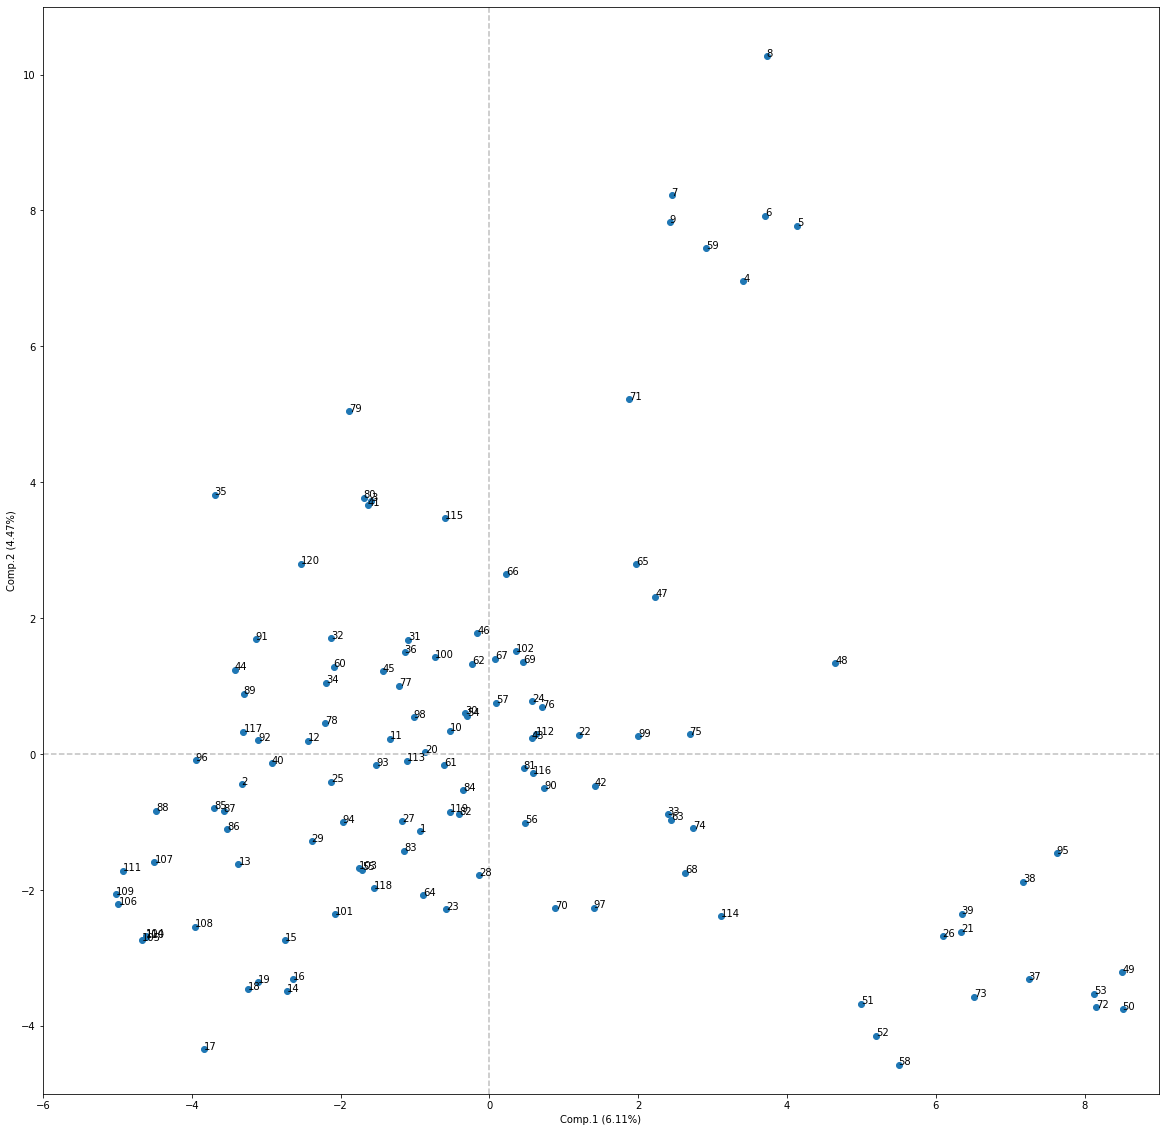

In [55]:
famd.plot_individuals(famd_features, pca, 1, 2)

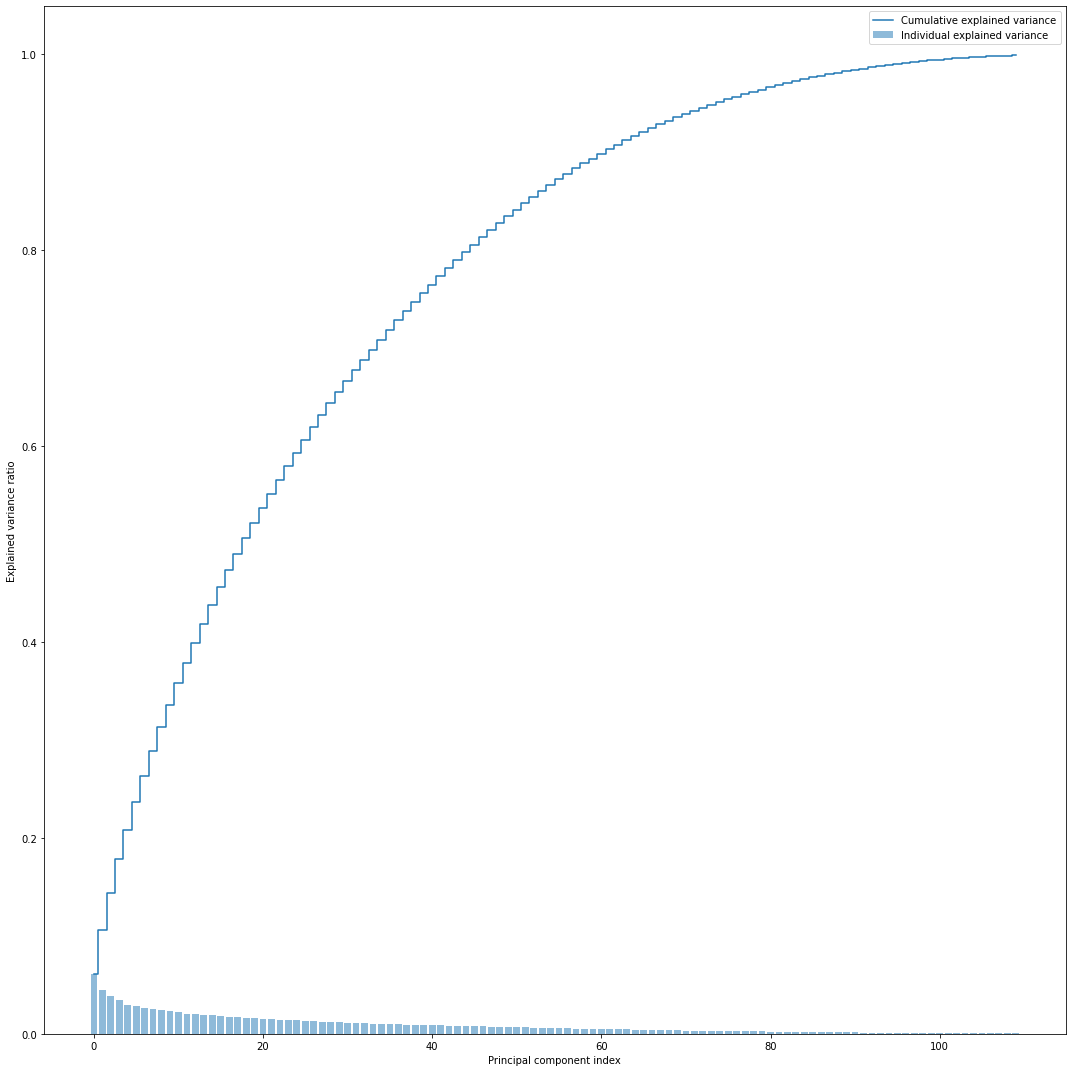

In [56]:
cum_sum = famd.explained_variance(pca)

In [57]:
pca.explained_variance_ratio_[:10]*100

array([6.11273465, 4.46630126, 3.83772211, 3.46008153, 2.9013189 ,
       2.87781274, 2.62309345, 2.57574611, 2.44599409, 2.28383964])

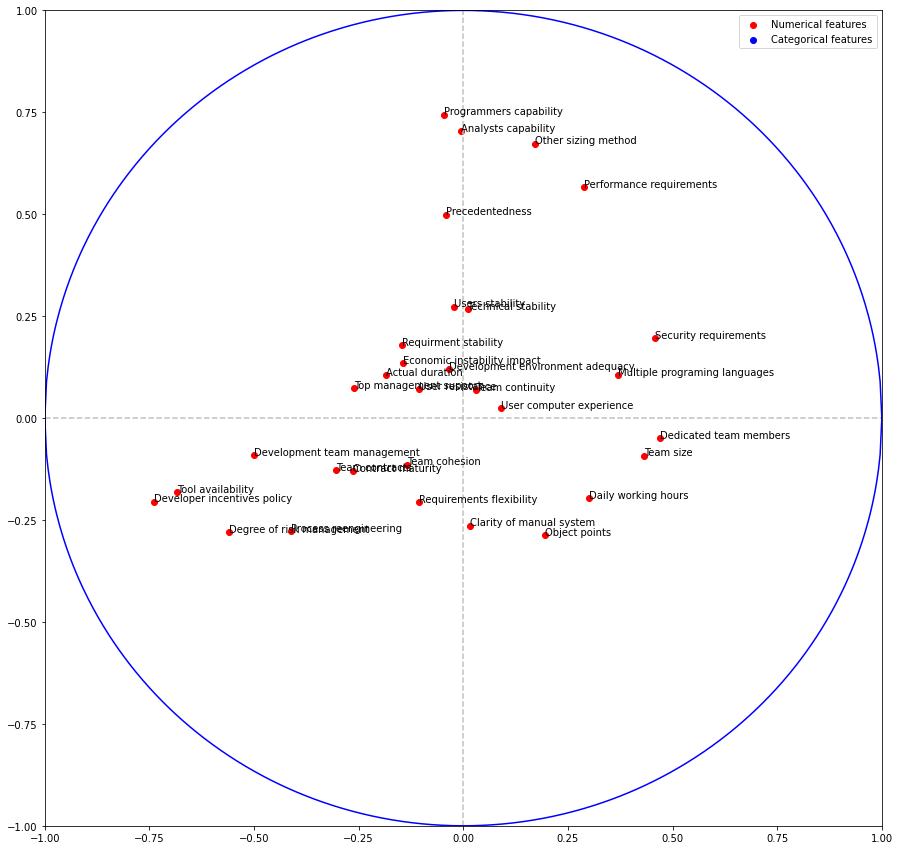

In [58]:
corr, asso = famd.corr_cercle(numerical_columns, [], data, famd_features, 1, 2)

In [59]:
corr

,Principal component 1,Principal component 2
Process reengineering,-0.411062,-0.277621
Analysts capability,-0.006643,0.704341
Team cohesion,-0.134783,-0.113827
Top management support,-0.260677,0.073815
Security requirements,0.457788,0.195898
Requirements flexibility,-0.104735,-0.205459
Team continuity,0.031431,0.068724
Clarity of manual system,0.015993,-0.263524
Programmers capability,-0.046165,0.744394
Precedentedness,-0.040736,0.498962


# Final famd features 

In [60]:
pca2 = famd.pca(df, 0.95)
final_famd_features = famd.famd_features(pca2, df)
final_famd_features

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7,Principal component 8,Principal component 9,Principal component 10,Principal component 11,Principal component 12,Principal component 13,Principal component 14,Principal component 15,Principal component 16,Principal component 17,Principal component 18,Principal component 19,Principal component 20,Principal component 21,Principal component 22,Principal component 23,Principal component 24,Principal component 25,Principal component 26,Principal component 27,Principal component 28,Principal component 29,Principal component 30,Principal component 31,Principal component 32,Principal component 33,Principal component 34,Principal component 35,...,Principal component 41,Principal component 42,Principal component 43,Principal component 44,Principal component 45,Principal component 46,Principal component 47,Principal component 48,Principal component 49,Principal component 50,Principal component 51,Principal component 52,Principal component 53,Principal component 54,Principal component 55,Principal component 56,Principal component 57,Principal component 58,Principal component 59,Principal component 60,Principal component 61,Principal component 62,Principal component 63,Principal component 64,Principal component 65,Principal component 66,Principal component 67,Principal component 68,Principal component 69,Principal component 70,Principal component 71,Principal component 72,Principal component 73,Principal component 74,Principal component 75
1,-0.937,-1.138,-0.105,5.556,-0.973,1.727,-1.730,-2.103,-1.831,2.596,1.325,-0.813,1.035,-1.273,-1.515,2.422,1.264,-1.659,-1.646,-2.421,-0.431,-2.064,0.177,2.782,0.500,1.240,0.342,0.615,2.304,1.331,1.807,2.107,-1.663,0.778,0.270,...,1.244,1.819,0.440,-1.385,-0.894,0.332,1.656,0.865,0.801,0.048,-1.262,0.680,0.294,-1.464,2.267,0.039,-1.059,1.986,1.025,-2.165,0.050,0.018,-0.881,1.552,-0.999,1.540,-1.899,-1.330,-1.247,2.741,0.379,-1.030,-0.699,0.655,-0.633
2,-3.331,-0.443,2.136,2.137,0.017,4.972,0.709,1.011,-0.678,2.410,-1.338,2.081,-0.525,-1.630,0.153,-0.508,-1.761,0.158,1.461,2.808,-5.260,-1.050,-4.125,0.357,-0.668,-3.877,-2.897,0.671,1.123,3.591,-0.635,0.745,-2.277,-2.560,-2.219,...,1.226,-1.599,-0.111,-1.702,0.707,0.855,-0.448,-3.392,-0.756,-2.092,-1.526,0.355,1.794,1.402,-1.382,0.355,0.407,0.148,0.741,-0.419,0.347,0.395,-0.825,0.294,0.406,-0.317,0.090,-0.524,-1.091,0.092,0.421,0.496,-0.081,-0.900,-0.166
3,-1.585,3.728,-0.346,-0.866,0.241,2.252,0.323,5.893,2.639,2.501,0.385,1.854,0.822,0.364,-0.888,0.354,-0.236,0.694,-0.929,2.719,-1.070,3.872,-4.046,-0.031,-2.785,1.915,1.092,-1.634,-2.806,1.121,0.172,0.989,0.643,-1.498,-1.403,...,2.301,1.513,0.759,-1.176,0.549,-0.143,1.191,1.710,-2.700,0.690,0.082,0.530,1.516,0.591,-1.636,-0.217,2.345,0.764,-1.396,0.916,-0.733,1.078,-0.190,-0.416,-0.067,1.110,0.379,0.167,0.851,1.004,0.050,-0.101,-0.836,-0.242,0.376
4,3.412,6.957,-1.506,-2.775,0.523,-0.635,-3.111,-0.843,-0.193,-0.934,-0.508,-1.285,0.129,-0.195,1.391,0.018,0.825,-1.914,-0.043,-1.146,0.692,-0.922,0.450,-0.061,0.224,-0.540,0.164,0.456,0.282,-0.052,0.522,-3.573,-0.661,0.001,-1.628,...,0.256,-1.588,-0.336,0.217,-0.702,-0.074,-0.575,-0.396,0.236,0.162,-0.830,-0.450,-0.036,0.836,0.048,1.529,-0.090,0.016,0.137,-0.374,-0.415,2.852,-2.383,0.591,-2.084,-0.497,0.860,0.727,-0.983,1.046,0.041,-0.074,-0.014,-0.182,0.401
5,4.134,7.775,-0.747,-2.915,-0.128,0.040,-2.598,-1.745,-2.003,-0.917,1.446,-2.054,-1.101,0.658,1.225,0.183,-1.331,0.382,0.829,-1.702,-2.238,-2.686,0.802,0.684,-1.610,1.116,-1.231,-3.740,-0.140,0.597,-1.106,3.080,0.423,0.262,-3.759,...,-0.917,3.569,0.287,3.499,0.440,-2.002,-1.345,0.272,-2.672,-2.550,0.938,-1.024,-0.393,-3.274,-0.700,-0.485,-1.326,-0.224,-0.261,1.977,-0.487,-0.459,-0.271,-1.621,0.915,0.844,-2.279,0.751,-1.021,0.750,-0.089,0.296,-0.233,-0.498,-0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

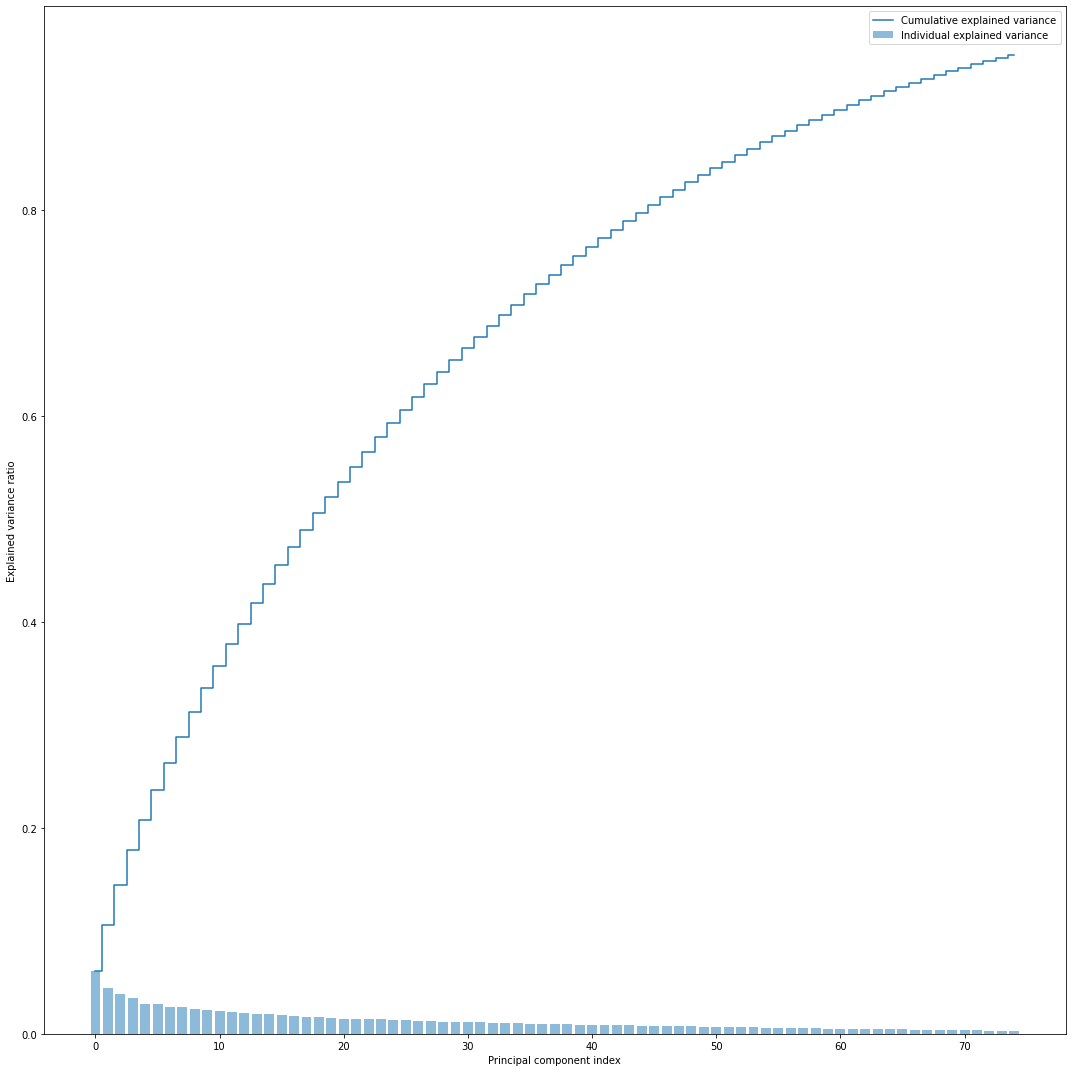

In [61]:
cum_sum2 = famd.explained_variance(pca2)

# Saving new features

In [62]:
dm.save_data(final_famd_features, 'reduced_famd_data')